# Loading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("data/Big Data 2.csv", encoding="utf-8")

# Display the first few rows to verify the data
print("First few rows of the dataset:")
df.head()

print("\nShape of the dataset:")
print(df.shape)

First few rows of the dataset:

Shape of the dataset:
(197677, 18)


## Cleaning to not have any empty values

In [3]:
# Drop rows with any empty values (NaN)
df_no_nan = df.


# Display the shape of the cleaned dataset
print("\nShape of the dataset after cleaning:")
print(df_no_nan.shape)

# Dropped data
# Calculate number of dropped rows
dropped_rows = df.shape[0] - df_no_nan.shape[0]
print(f"\nNumber of rows dropped: {dropped_rows}")
print(f"Percentage of data dropped: {(dropped_rows/df.shape[0]*100):.2f}%")

# Display info about which columns had missing values
print("\nMissing values by column before cleaning:")
missing_values = df.isnull().sum()
missing_values = missing_values[
    missing_values > 0
]  # Only show columns with missing values
print(missing_values)


Shape of the dataset after cleaning:
(197677, 18)

Number of rows dropped: 0
Percentage of data dropped: 0.00%

Missing values by column before cleaning:
stock__share_type__company__country__code       30
quality                                       8215
growth                                       45472
value                                        11816
dividend                                     94127
market_cap_usd                                  87
enterprise_value_usd                            87
volume                                        6422
profit_1m                                    59243
profit_3m                                    84989
profit_6m                                    65104
profit_1y                                    64232
profit_2y                                    52590
profit_5y                                    90128
dtype: int64


# Analyzing

In [4]:
# Lets analyze the distribution of the data
print("\nDistribution of the data:")
print(df_no_nan.describe())


Distribution of the data:
             quality         growth          value       dividend  \
count  189462.000000  152205.000000  185861.000000  103550.000000   
mean       53.326720      44.260512      49.675246      58.479950   
std        19.042215      33.475714      22.556760      26.593374   
min         0.000000       0.000000       0.000000       0.000000   
25%        39.687714      11.378636      33.513454      38.996381   
50%        54.779341      44.439036      50.990650      60.438596   
75%        67.669903      71.293999      66.666667      83.778762   
max       100.000000     100.000000     100.000000     100.000000   

       market_cap_usd  enterprise_value_usd        volume      profit_1m  \
count    1.975900e+05          1.975900e+05  1.912550e+05  138434.000000   
mean     5.062409e+09          5.608727e+09  3.918673e+06       0.144567   
std      5.336754e+10          5.391589e+10  4.302806e+07      20.817721   
min      0.000000e+00         -2.122863e+10  0.

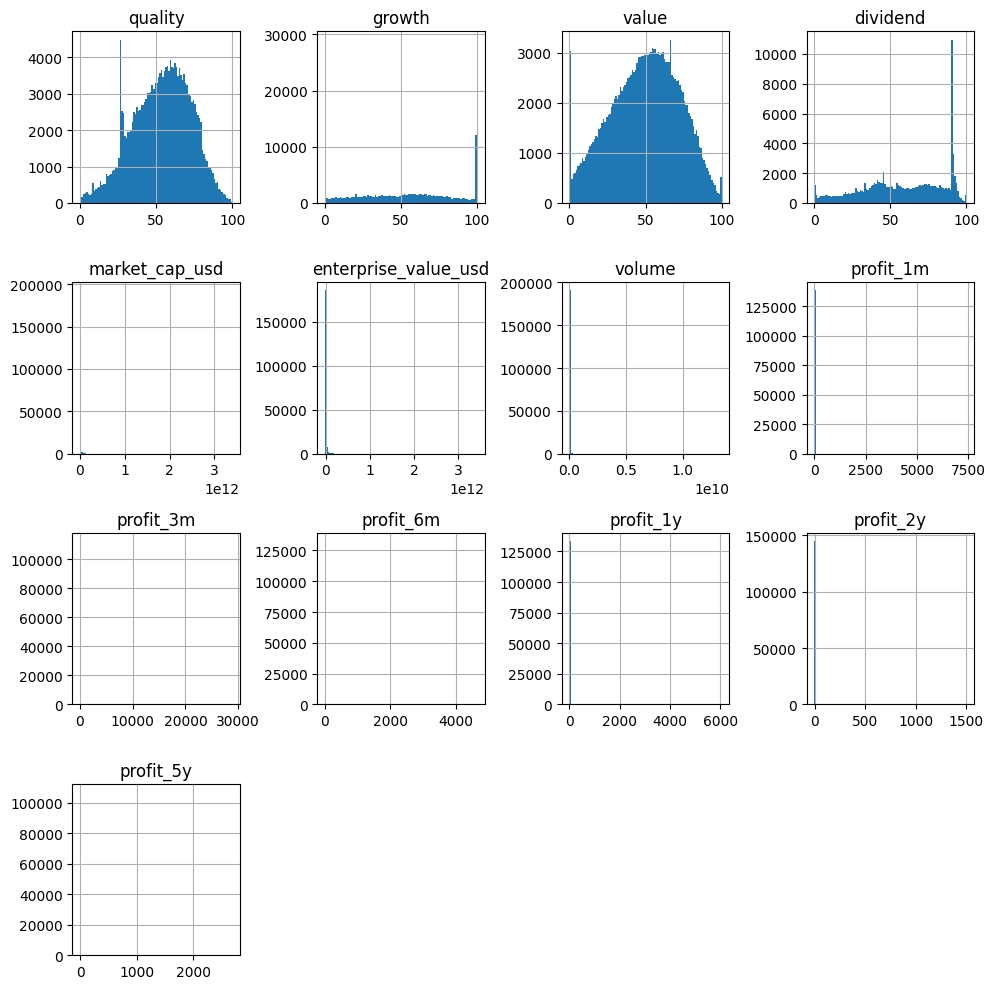

<Figure size 1920x1440 with 0 Axes>

In [5]:
# distribution of the data
df_no_nan.hist(figsize=(10, 10), bins=100)
plt.tight_layout()  # Adjust spacing between subplots
plt.show(block=False)  # Show plot without blocking
plt.gcf().set_dpi(300)  # Increase DPI for higher resolution


# Create a normalized version of the dataframe
# Select only numeric columns
numeric_columns = df_no_nan.select_dtypes(include=["float64", "int64"]).columns

# Normalize only numeric columns
df_normalized = df_no_nan.copy()
for column in numeric_columns:
    df_normalized[column] = (
        2
        * (
            (df_no_nan[column] - df_no_nan[column].min())
            / (df_no_nan[column].max() - df_no_nan[column].min())
        )
        - 1
    )

### Deeper plots

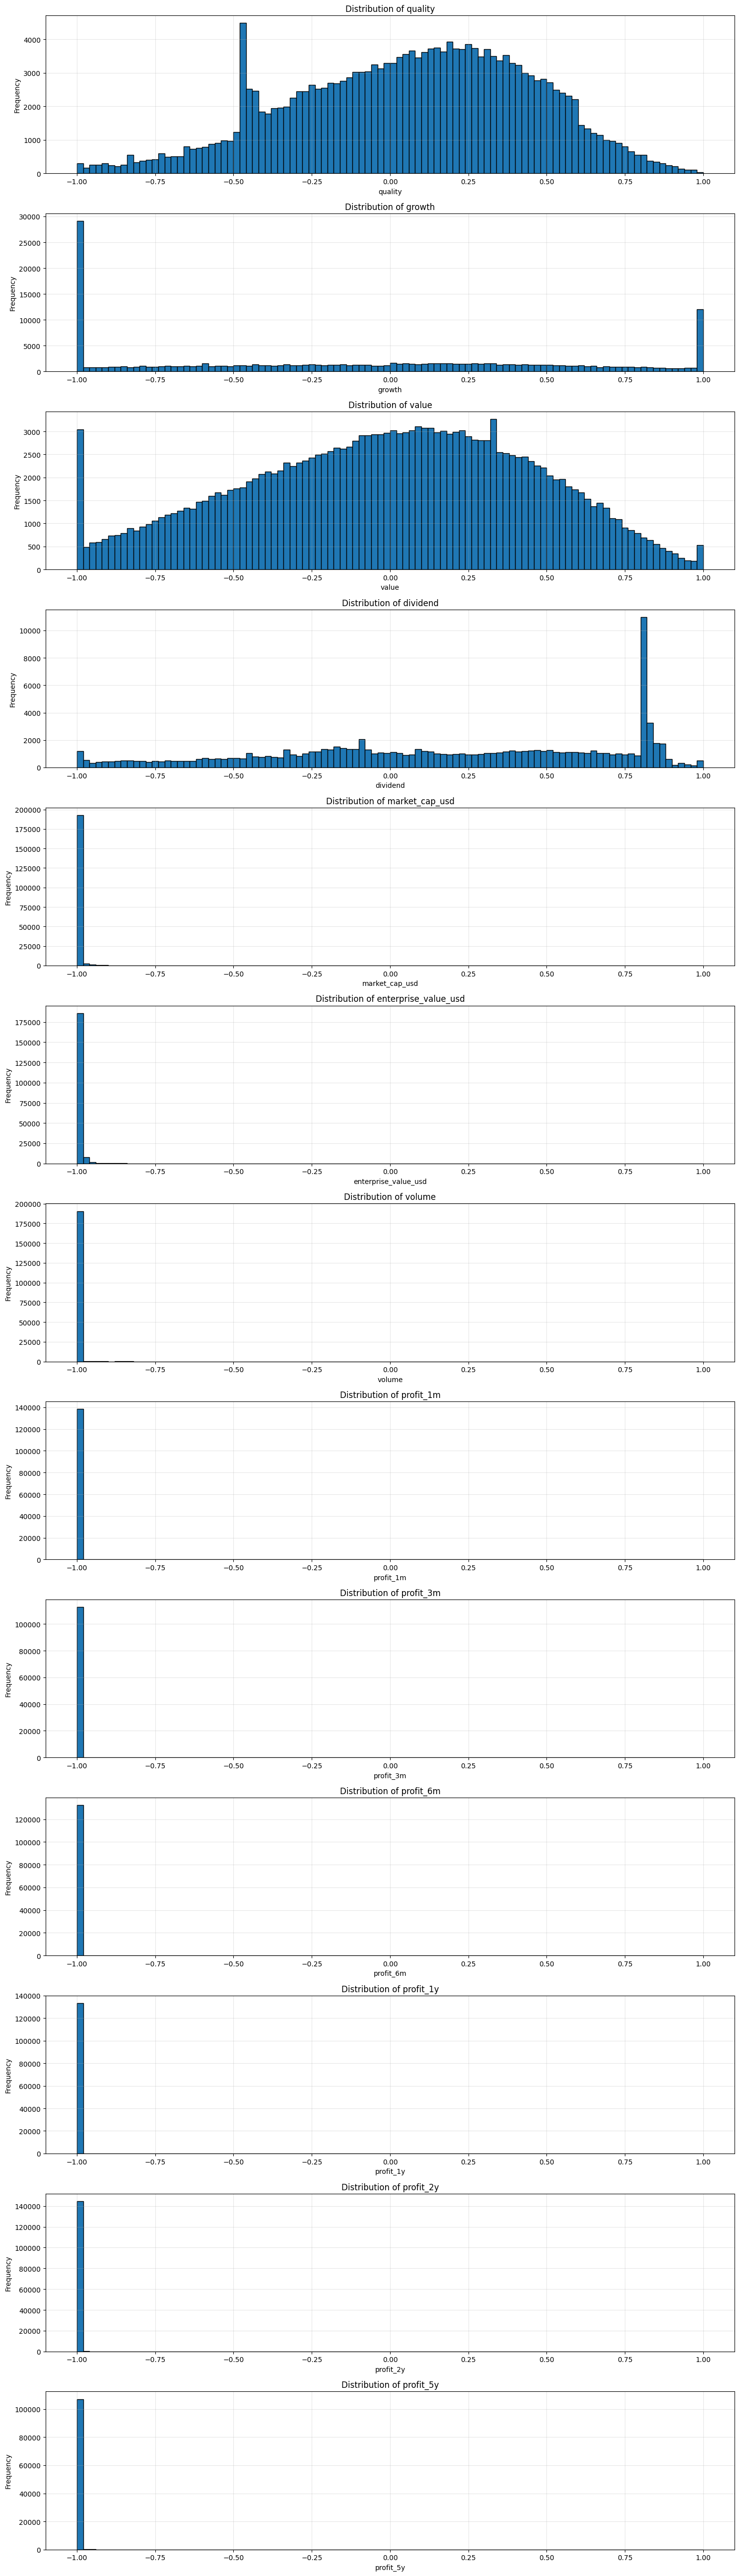

In [6]:
# Create individual histograms for each numeric column
plt.figure(
    figsize=(15, len(numeric_columns) * 4)
)  # Adjust figure size based on number of columns

for idx, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, idx)
    plt.hist(df_normalized[column], bins=100, edgecolor="black")
    # plt.hist(df[column], bins=100, edgecolor="black") # Note: change this for original data

    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Excluding outliers

Number of outliers removed: 180045


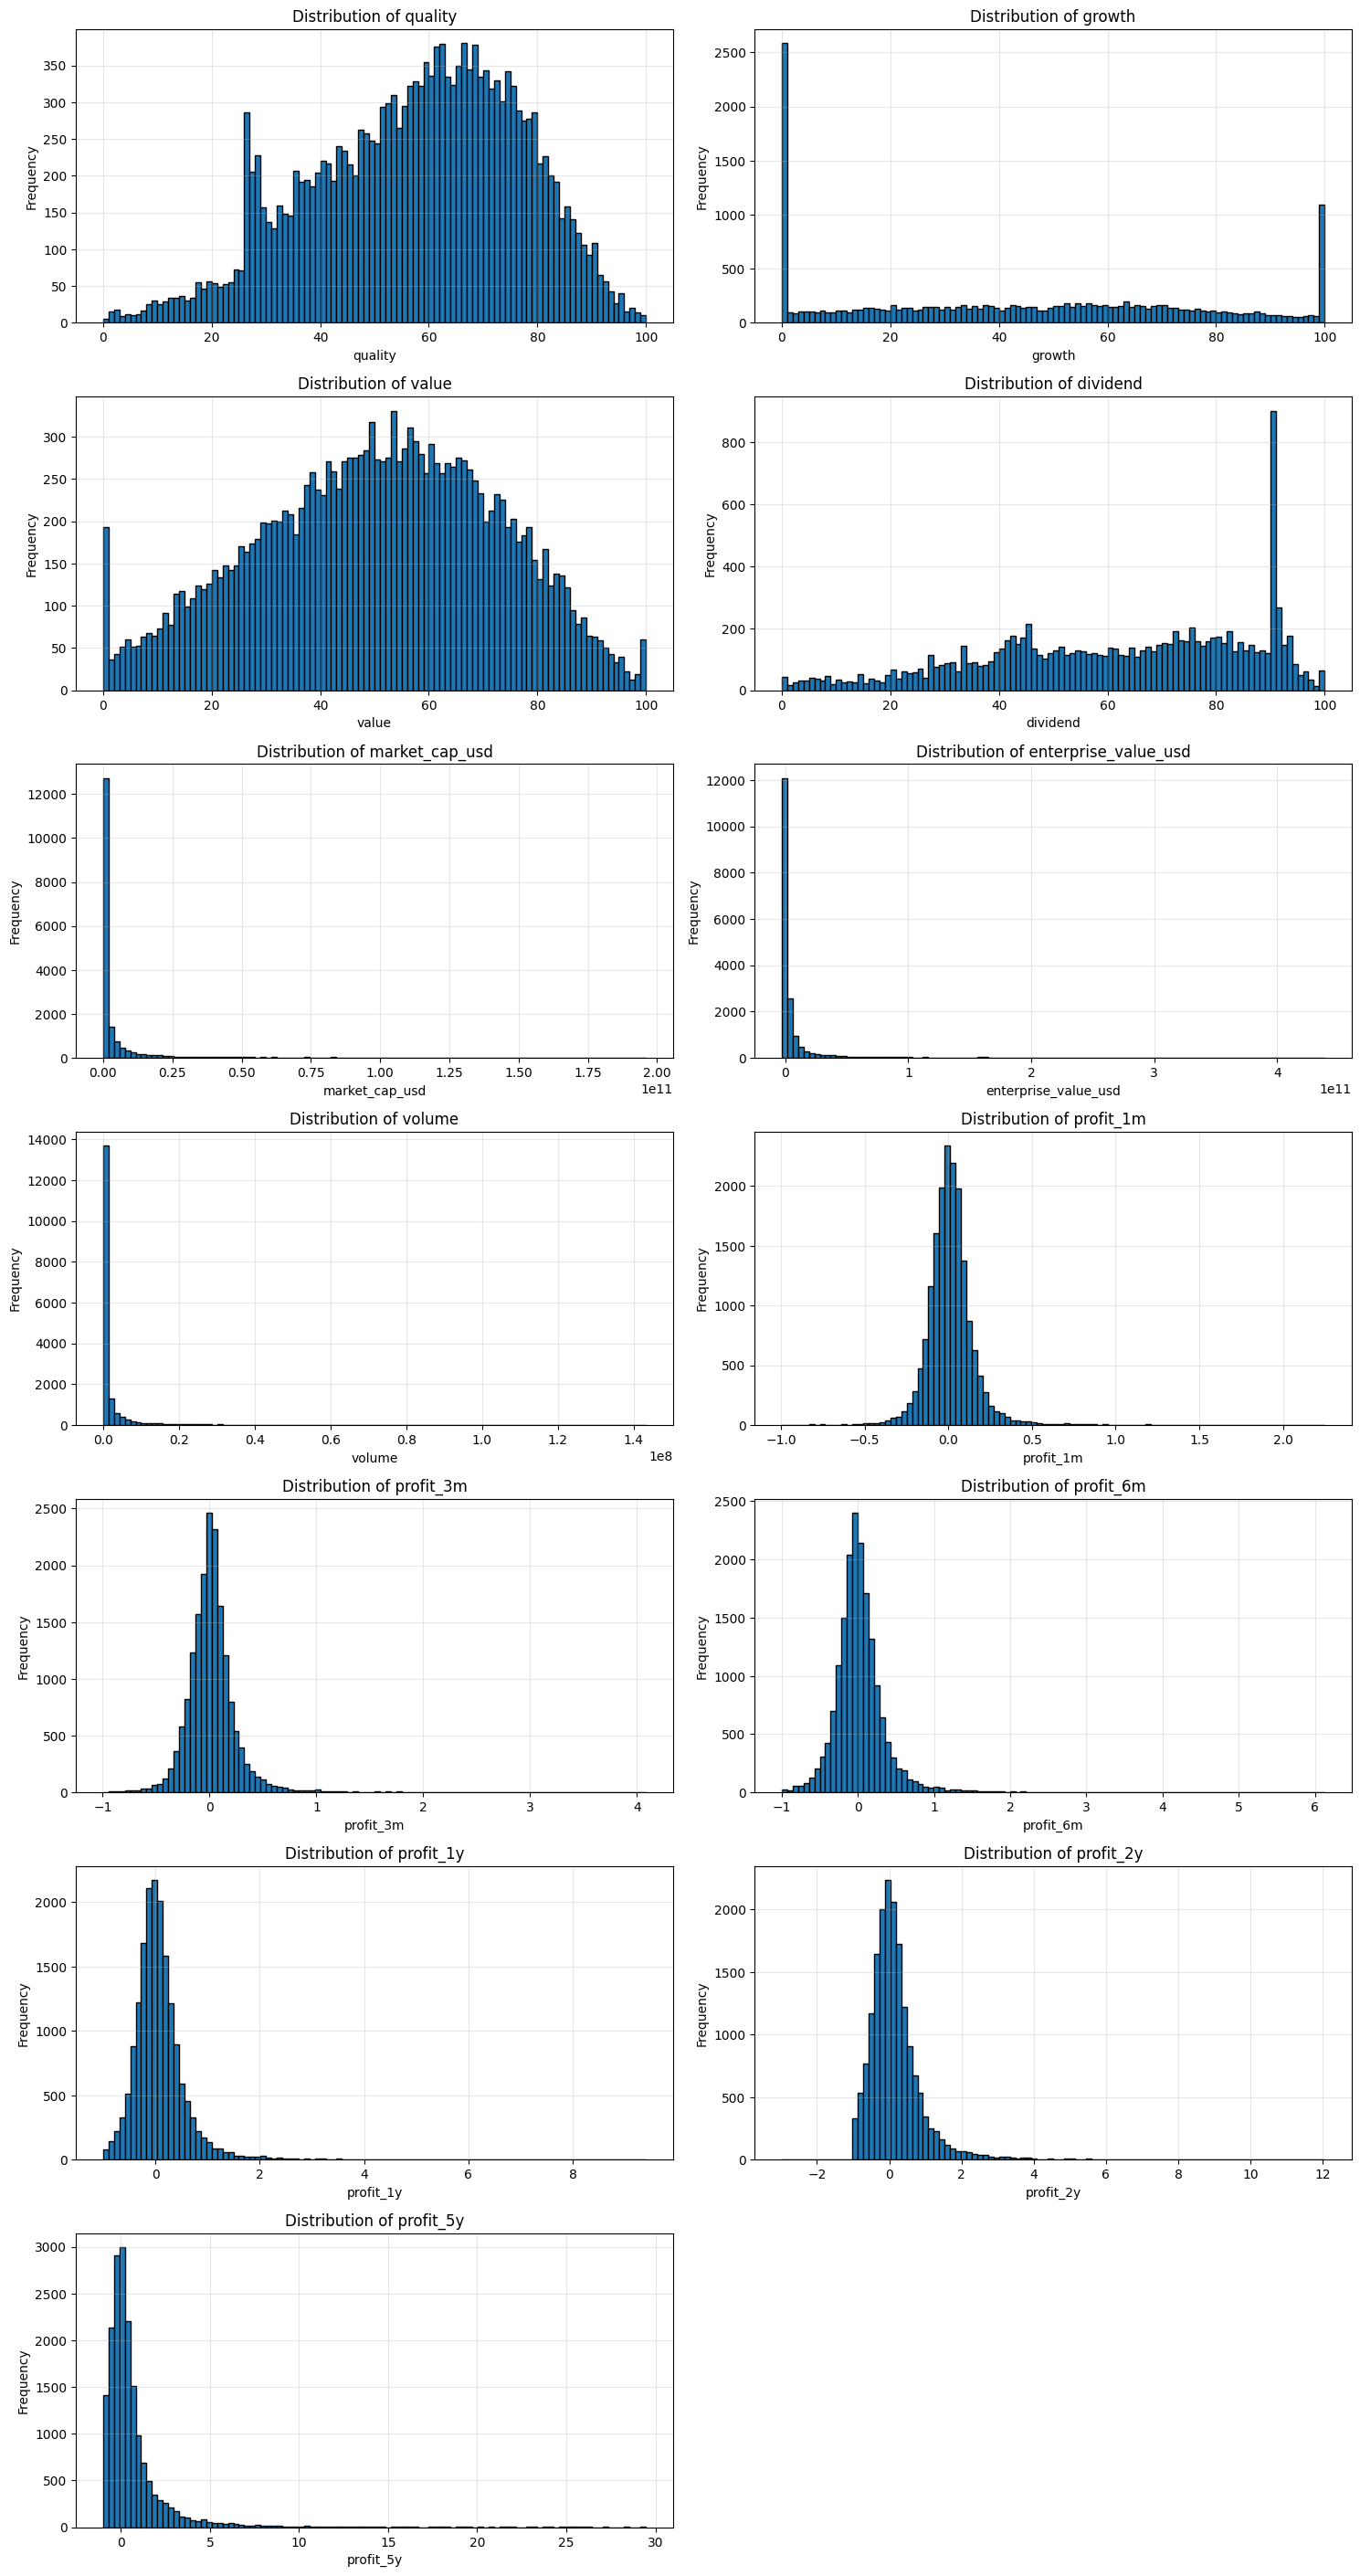

In [10]:
# Exclude outliers from market cap, and profits
# Calculate Q1, Q3, and IQR for market cap and profits
exclude_outliers = 0.01  # % of outliers to exclude

# market cap
Q1_market_cap = df_no_nan["market_cap_usd"].quantile(exclude_outliers)
Q3_market_cap = df_no_nan["market_cap_usd"].quantile(1 - exclude_outliers)
IQR_market_cap = Q3_market_cap - Q1_market_cap

# enterprise value
Q1_enterprise_value = df_no_nan["enterprise_value_usd"].quantile(exclude_outliers)
Q3_enterprise_value = df_no_nan["enterprise_value_usd"].quantile(1 - exclude_outliers)
IQR_enterprise_value = Q3_enterprise_value - Q1_enterprise_value

# volume
Q1_volume = df_no_nan["volume"].quantile(exclude_outliers)
Q3_volume = df_no_nan["volume"].quantile(1 - exclude_outliers)
IQR_volume = Q3_volume - Q1_volume

# Profits

Q1_profit_1m = df_no_nan["profit_1m"].quantile(exclude_outliers)
Q1_profit_3m = df_no_nan["profit_3m"].quantile(exclude_outliers)
Q1_profit_6m = df_no_nan["profit_6m"].quantile(exclude_outliers)
Q1_profit_1y = df_no_nan["profit_1y"].quantile(exclude_outliers)
Q1_profit_2y = df_no_nan["profit_2y"].quantile(exclude_outliers)
Q1_profit_5y = df_no_nan["profit_5y"].quantile(exclude_outliers)
Q3_profit_1m = df_no_nan["profit_1m"].quantile(1 - exclude_outliers)
Q3_profit_3m = df_no_nan["profit_3m"].quantile(1 - exclude_outliers)
Q3_profit_6m = df_no_nan["profit_6m"].quantile(1 - exclude_outliers)
Q3_profit_1y = df_no_nan["profit_1y"].quantile(1 - exclude_outliers)
Q3_profit_2y = df_no_nan["profit_2y"].quantile(1 - exclude_outliers)
Q3_profit_5y = df_no_nan["profit_5y"].quantile(1 - exclude_outliers)


# Define bounds for outliers (using 1.5 * IQR rule)
lower_bound_market_cap = Q1_market_cap - 1.5 * IQR_market_cap
upper_bound_market_cap = Q3_market_cap + 1.5 * IQR_market_cap

lower_bound_enterprise_value = Q1_enterprise_value - 1.5 * IQR_enterprise_value
upper_bound_enterprise_value = Q3_enterprise_value + 1.5 * IQR_enterprise_value

lower_bound_volume = Q1_volume - 1.5 * IQR_volume
upper_bound_volume = Q3_volume + 1.5 * IQR_volume


lower_bound_profit_1m = Q1_profit_1m - 1.5 * (Q3_profit_1m - Q1_profit_1m)
lower_bound_profit_3m = Q1_profit_3m - 1.5 * (Q3_profit_3m - Q1_profit_3m)
lower_bound_profit_6m = Q1_profit_6m - 1.5 * (Q3_profit_6m - Q1_profit_6m)
lower_bound_profit_1y = Q1_profit_1y - 1.5 * (Q3_profit_1y - Q1_profit_1y)
lower_bound_profit_2y = Q1_profit_2y - 1.5 * (Q3_profit_2y - Q1_profit_2y)
lower_bound_profit_5y = Q1_profit_5y - 1.5 * (Q3_profit_5y - Q1_profit_5y)

upper_bound_profit_1m = Q3_profit_1m + 1.5 * (Q3_profit_1m - Q1_profit_1m)
upper_bound_profit_3m = Q3_profit_3m + 1.5 * (Q3_profit_3m - Q1_profit_3m)
upper_bound_profit_6m = Q3_profit_6m + 1.5 * (Q3_profit_6m - Q1_profit_6m)
upper_bound_profit_1y = Q3_profit_1y + 1.5 * (Q3_profit_1y - Q1_profit_1y)
upper_bound_profit_2y = Q3_profit_2y + 1.5 * (Q3_profit_2y - Q1_profit_2y)
upper_bound_profit_5y = Q3_profit_5y + 1.5 * (Q3_profit_5y - Q1_profit_5y)


# Create a new dataframe excluding outliers
df_no_outliers = df_no_nan[
    (df_no_nan["market_cap_usd"] >= lower_bound_market_cap)
    & (df_no_nan["market_cap_usd"] <= upper_bound_market_cap)
    & (df_no_nan["profit_1m"] >= lower_bound_profit_1m)
    & (df_no_nan["profit_1m"] <= upper_bound_profit_1m)
    & (df_no_nan["profit_3m"] >= lower_bound_profit_3m)
    & (df_no_nan["profit_3m"] <= upper_bound_profit_3m)
    & (df_no_nan["profit_6m"] >= lower_bound_profit_6m)
    & (df_no_nan["profit_6m"] <= upper_bound_profit_6m)
    & (df_no_nan["profit_1y"] >= lower_bound_profit_1y)
    & (df_no_nan["profit_1y"] <= upper_bound_profit_1y)
    & (df_no_nan["profit_2y"] >= lower_bound_profit_2y)
    & (df_no_nan["profit_2y"] <= upper_bound_profit_2y)
    & (df_no_nan["profit_5y"] >= lower_bound_profit_5y)
    & (df_no_nan["profit_5y"] <= upper_bound_profit_5y)
    & (df_no_nan["volume"] >= lower_bound_volume)
    & (df_no_nan["volume"] <= upper_bound_volume)
    # & (df["enterprise_value_usd"] >= lower_bound_enterprise_value)
    # & (df["enterprise_value_usd"] <= upper_bound_enterprise_value)
    #     & (df["growth"] != 0)
    #     & (df["growth"] != 100)
    #     & (df["value"] != 0)
    #     & (df["value"] != 100)
]

# Print the shape before and after removing outliers
# print(f"Original dataset shape: {df.shape}")
# print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")
print(f"Number of outliers removed: {df_no_nan.shape[0] - df_no_outliers.shape[0]}")

# New histograms to check the outliers
# Create histograms for each numeric column in the cleaned dataset
plt.figure(figsize=(15, len(numeric_columns) * 4))

for idx, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, idx)
    plt.hist(df_no_outliers[column], bins=100, edgecolor="black")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)

plt.tight_layout()

Data Retention:
Original records: 197,677
Cleaned records: 17,632
Retention rate: 8.92%

Comparison of key statistics:

quality:
Original mean: 53.33
Cleaned mean: 57.62
Original std: 19.04
Cleaned std: 19.13

growth:
Original mean: 44.26
Cleaned mean: 43.73
Original std: 33.48
Cleaned std: 32.22

value:
Original mean: 49.68
Cleaned mean: 50.43
Original std: 22.56
Cleaned std: 22.01

dividend:
Original mean: 58.48
Cleaned mean: 61.49
Original std: 26.59
Cleaned std: 24.27

market_cap_usd:
Original mean: 5,062,408,500.82
Cleaned mean: 5,354,716,807.80
Original std: 53,367,542,296.50
Cleaned std: 17,363,687,078.66

enterprise_value_usd:
Original mean: 5,608,726,994.46
Cleaned mean: 6,097,993,439.77
Original std: 53,915,887,584.55
Cleaned std: 20,236,293,885.95

volume:
Original mean: 3,918,672.68
Cleaned mean: 2,589,515.56
Original std: 43,028,064.49
Cleaned std: 9,009,734.66

profit_1m:
Original mean: 0.14
Cleaned mean: 0.01
Original std: 20.82
Cleaned std: 0.15

profit_3m:
Original mea

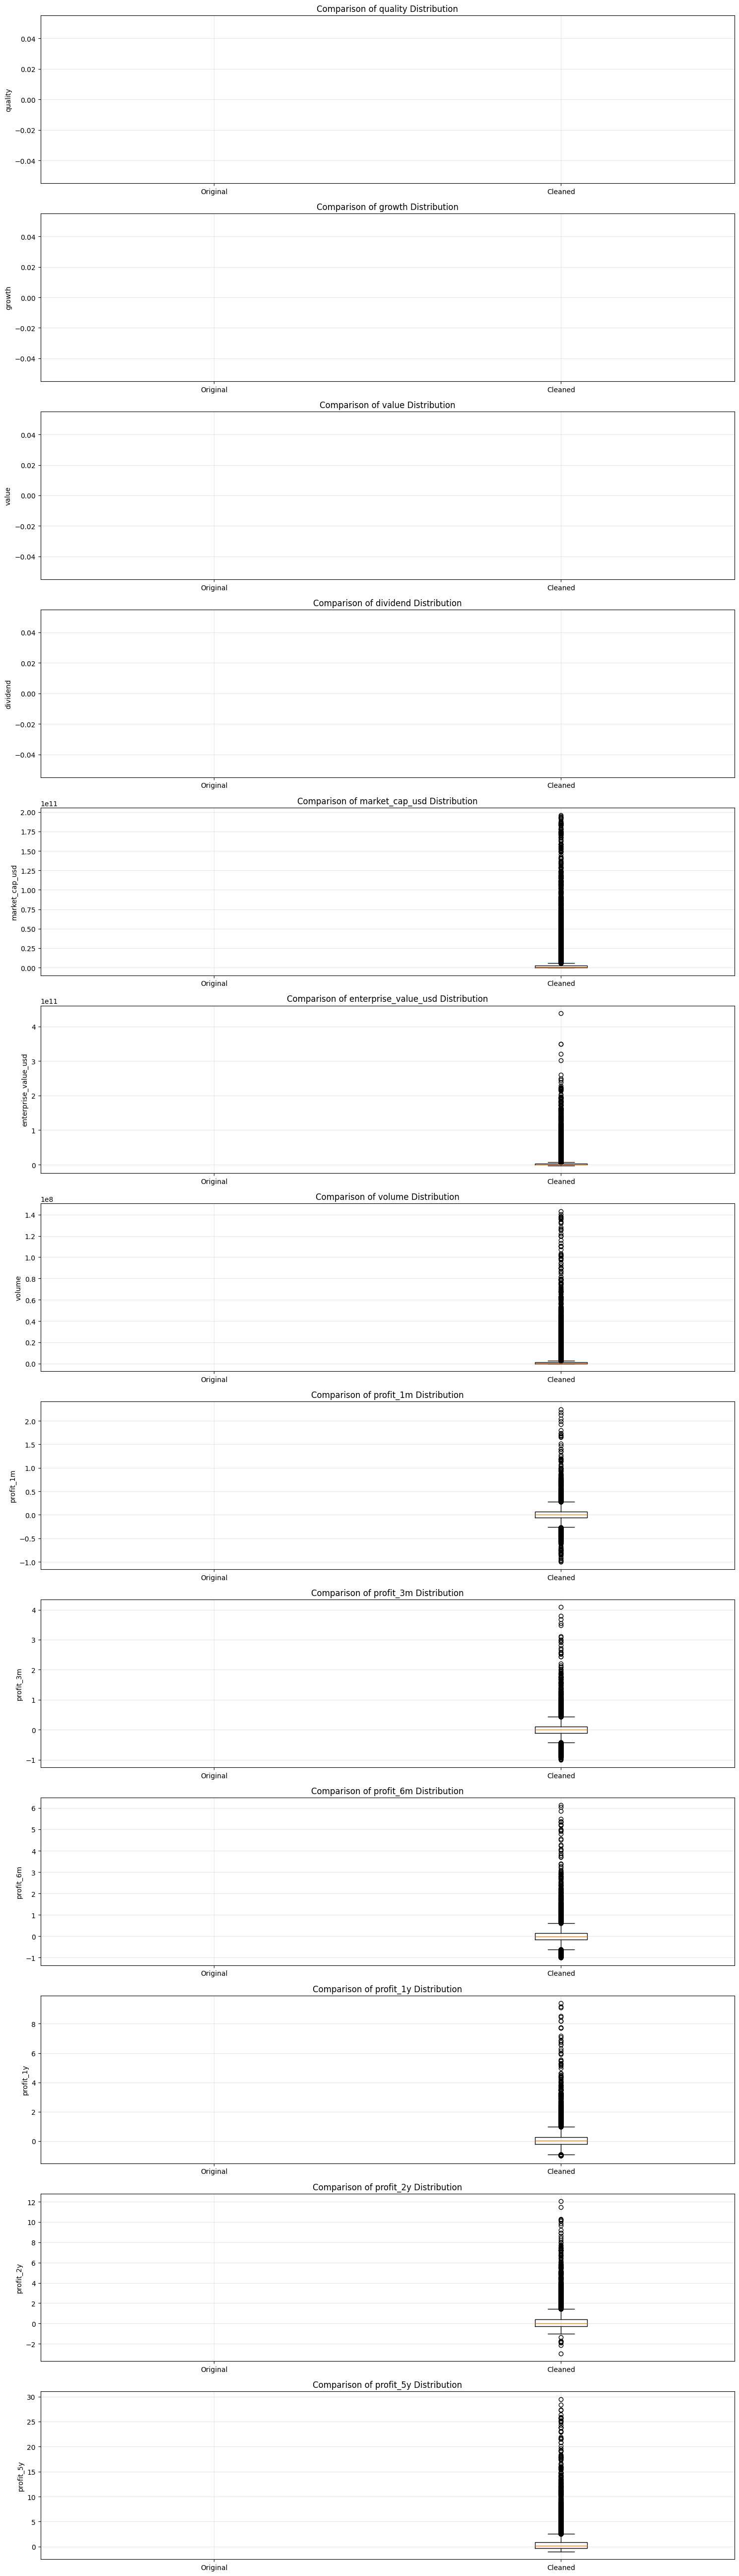

In [12]:
# Now compare the original and the cleaned data
# Create a new dataframe with the original data
df_original = df_no_nan.copy()

# Create a new dataframe with the cleaned data
df_cleaned = df_no_outliers.copy()


# Calculate basic statistics for both datasets
original_stats = df_original.describe()
cleaned_stats = df_cleaned.describe()

# Calculate the percentage of data retained
retention_rate = (len(df_cleaned) / len(df_original)) * 100

print("Data Retention:")
print(f"Original records: {len(df_original):,}")
print(f"Cleaned records: {len(df_cleaned):,}")
print(f"Retention rate: {retention_rate:.2f}%\n")

# Compare means and standard deviations
print("Comparison of key statistics:")
for column in numeric_columns:
    print(f"\n{column}:")
    print(f"Original mean: {df_original[column].mean():,.2f}")
    print(f"Cleaned mean: {df_cleaned[column].mean():,.2f}")
    print(f"Original std: {df_original[column].std():,.2f}")
    print(f"Cleaned std: {df_cleaned[column].std():,.2f}")

# Create side-by-side box plots for visual comparison
plt.figure(figsize=(15, len(numeric_columns) * 4))

for idx, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, idx)

    # Create box plots
    box_data = [df_original[column], df_cleaned[column]]
    plt.boxplot(box_data, tick_labels=["Original", "Cleaned"])

    plt.title(f"Comparison of {column} Distribution")
    plt.ylabel(column)
    plt.grid(True, alpha=0.3)

plt.tight_layout()

# Export cleaned data

In [13]:
# Create 'data' directory if it doesn't exist
import os

if not os.path.exists("data"):
    os.makedirs("data")

# Export the cleaned dataset to CSV
cleaned_data_path = "data/Big_cleaned_data_2.csv"
df_cleaned.to_csv(cleaned_data_path, index=False)

print(f"Cleaned data exported to: {cleaned_data_path}")

Cleaned data exported to: data/Big_cleaned_data_2.csv
